# Decision Trees: Comparision between ID3 and CART

## Download the dataset

In [1]:
!rm -rf iris.csv
!wget https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv

--2022-02-16 15:28:16--  https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv
Resolving gist.githubusercontent.com (gist.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to gist.githubusercontent.com (gist.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3975 (3.9K) [text/plain]
Saving to: ‘iris.csv’

iris.csv            100%[===================>]   3.88K  --.-KB/s    in 0.02s   

2022-02-16 15:28:19 (227 KB/s) - ‘iris.csv’ saved [3975/3975]



## Importing libraries

1. Pandas : For data manipulation and storage

2. Train test split : for splitting the dataset into training data and testing data

3. DecisionTreeClassifier : The machine learning algorithm for decision tree

4. Metrics : Accuracy, Recall, Precision, F1 Score

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

## Load the dataset

In [3]:
df = pd.read_csv('iris.csv')
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


## Add a column 'class' representing the 'variety' as discrete values

In [4]:
df['class'] = df['variety'].map(
    {
        'Setosa': 0,
        'Versicolor': 1,
        'Virginica': 2
    }
)

## Get the independent (X) data

In [5]:
X = df[['sepal.length', 'sepal.width', 'petal.length', 'petal.width']]
X

,sepal.length,sepal.width,petal.length,petal.width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


## Get the dependent (Y) data

In [6]:
Y = df[['class']]
Y

,class
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


## Split the dataset into training and testing data

In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

## Create ID3 and CART classifiers

In [8]:
id3 = DecisionTreeClassifier(criterion='entropy')
cart = DecisionTreeClassifier(criterion='gini')

## Create the ID3 and CART models and test them

In [9]:
id3_model = id3.fit(X_train, Y_train)
cart_model = cart.fit(X_train, Y_train)
Y_id3 = id3_model.predict(X_test)
Y_cart = cart_model.predict(X_test)

# ID3 Metrics

In [10]:
accuracy = accuracy_score(Y_test, Y_id3)
recall = recall_score(Y_test, Y_id3, average='micro')
precision = precision_score(Y_test, Y_id3, average='micro')
f1 = f1_score(Y_test, Y_id3, average='micro')
print("Accuracy:", accuracy)
print("Error Rate:", 1.0-accuracy)
print("Recall:", recall)
print("Precision:", precision)
print("F1 Score:", f1)

Accuracy: 0.9555555555555556
Error Rate: 0.0444444444444444
Recall: 0.9555555555555556
Precision: 0.9555555555555556
F1 Score: 0.9555555555555556


# CART Metrics

In [11]:
accuracy = accuracy_score(Y_test, Y_cart)
recall = recall_score(Y_test, Y_cart, average='micro')
precision = precision_score(Y_test, Y_cart, average='micro')
f1 = f1_score(Y_test, Y_cart, average='micro')
print("Accuracy:", accuracy)
print("Error Rate:", 1.0-accuracy)
print("Recall:", recall)
print("Precision:", precision)
print("F1 Score:", f1)

Accuracy: 0.9555555555555556
Error Rate: 0.0444444444444444
Recall: 0.9555555555555556
Precision: 0.9555555555555556
F1 Score: 0.9555555555555556


# Association Analysis

In [12]:
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt

In [13]:
## Use this to read data directly from github
df = pd.read_csv('https://gist.githubusercontent.com/Harsh-Git-Hub/2979ec48043928ad9033d8469928e751/raw/72de943e040b8bd0d087624b154d41b2ba9d9b60/retail_dataset.csv', sep=',')
## Print first 10 rows 
df.head(10)

,0,1,2,3,4,5,6
0,Bread,Wine,Eggs,Meat,Cheese,Pencil,Diaper
1,Bread,Cheese,Meat,Diaper,Wine,Milk,Pencil
2,Cheese,Meat,Eggs,Milk,Wine,NaN,NaN
3,Cheese,Meat,Eggs,Milk,Wine,NaN,NaN
4,Meat,Pencil,Wine,NaN,NaN,NaN,NaN
5,Eggs,Bread,Wine,Pencil,Milk,Diaper,Bagel
6,Wine,Pencil,Eggs,Cheese,NaN,NaN,NaN
7,Bagel,Bread,Milk,Pencil,Diaper,NaN,NaN
8,Bread,Diaper,Cheese,Milk,Wine,Eggs,NaN
9,Bagel,Wine,Diaper,Meat,Pencil,Eggs,Cheese


In [14]:
items = set()
for col in df:
    items.update(df[col].unique())
print(items)

{'Diaper', nan, 'Meat', 'Milk', 'Bread', 'Wine', 'Bagel', 'Eggs', 'Pencil', 'Cheese'}


In [15]:
# Data Preprocessing
itemset = set(items)
encoded_vals = []
for index, row in df.iterrows():
    rowset = set(row) 
    labels = {}
    uncommons = list(itemset - rowset)
    commons = list(itemset.intersection(rowset))
    for uc in uncommons:
        labels[uc] = 0
    for com in commons:
        labels[com] = 1
    encoded_vals.append(labels)
encoded_vals[0]
ohe_df = pd.DataFrame(encoded_vals)
print(ohe_df)

     NaN  Bagel  Milk  Diaper  Meat  Bread  Wine  Eggs  Pencil  Cheese
0      0      0     0       1     1      1     1     1       1       1
1      0      0     1       1     1      1     1     0       1       1
2      1      0     1       0     1      0     1     1       0       1
3      1      0     1       0     1      0     1     1       0       1
4      1      0     0       0     1      0     1     0       1       0
..   ...    ...   ...     ...   ...    ...   ...   ...     ...     ...
310    1      0     0       0     0      1     0     1       0       1
311    1      0     1       0     1      0     0     0       1       0
312    0      0     0       1     1      1     1     1       1       1
313    1      0     0       0     1      0     0     0       0       1
314    1      1     0       0     1      1     1     1       0       0

[315 rows x 10 columns]


In [16]:
freq_items = apriori(ohe_df, min_support=0.2, use_colnames=True)
freq_items.head(7)

,support,itemsets
0,0.869841,(nan)
1,0.425397,(Bagel)
2,0.501587,(Milk)
3,0.406349,(Diaper)
4,0.476190,(Meat)
5,0.504762,(Bread)
6,0.438095,(Wine)


In [17]:
rules = association_rules(freq_items, metric="confidence", min_threshold=0.6)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Bagel),(nan),0.425397,0.869841,0.336508,0.791045,0.909413,-0.033520,0.622902
1,(Milk),(nan),0.501587,0.869841,0.409524,0.816456,0.938626,-0.026778,0.709141
2,(Diaper),(nan),0.406349,0.869841,0.317460,0.781250,0.898152,-0.035999,0.595011
3,(Meat),(nan),0.476190,0.869841,0.368254,0.773333,0.889051,-0.045956,0.574230
4,(Bread),(nan),0.504762,0.869841,0.396825,0.786164,0.903801,-0.042237,0.608683


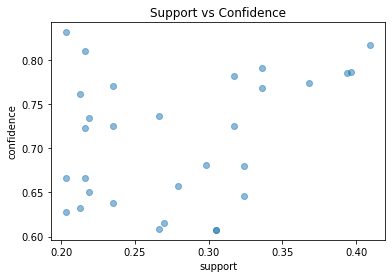

In [18]:
# Rules vs Confidence
plt.scatter(rules['support'], rules['confidence'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()

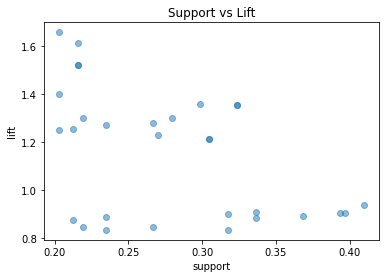

In [19]:
# Support vs Lift
plt.scatter(rules['support'], rules['lift'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('lift')
plt.title('Support vs Lift')
plt.show()

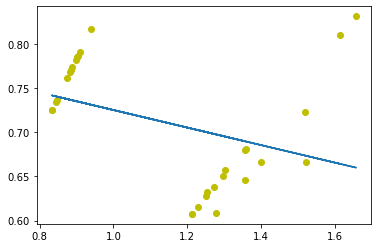

In [20]:
# Lift vs Confidence
fit = np.polyfit(rules['lift'], rules['confidence'], 1)
fit_fn = np.poly1d(fit)
plt.plot(rules['lift'], rules['confidence'], 'yo', rules['lift'], fit_fn(rules['lift']))

# KMeans Clustering

In [21]:
from sklearn.cluster import KMeans

In [22]:
kmeans = KMeans(n_clusters=3)
# Using dataset from Decision Tree program
model = kmeans.fit(X_train, Y_train)
Y_pred = kmeans.predict(X_test)

In [23]:
print("Accuracy:", accuracy_score(Y_test['class'], Y_pred))
print("Recall:", recall_score(Y_test['class'], Y_pred, average='weighted'))
print("Precision:", precision_score(Y_test['class'], Y_pred, average='weighted'))
print("F1 Score:", f1_score(Y_test['class'], Y_pred, average='weighted'))

Accuracy: 0.4
Recall: 0.4
Precision: 0.3908080808080808
F1 Score: 0.39122257053291537


# Linear and Logistic Regression

/bin/bash: rm-rf: command not found
--2022-02-16 15:28:32--  https://raw.githubusercontent.com/justmarkham/scikit-learn-videos/master/data/Advertising.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4555 (4.4K) [text/plain]
Saving to: ‘Advertising.csv.1’

Advertising.csv.1   100%[===================>]   4.45K  --.-KB/s    in 0.005s  

2022-02-16 15:28:35 (885 KB/s) - ‘Advertising.csv.1’ saved [4555/4555]

   Unnamed: 0     TV  Radio  Newspaper  Sales
0           1  230.1   37.8       69.2   22.1
1           2   44.5   39.3       45.1   10.4
2           3   17.2   45.9       69.3    9.3
3           4  151.5   41.3       58.5   18.5
4           5  180.8   10.8       58.4   12.9


Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')




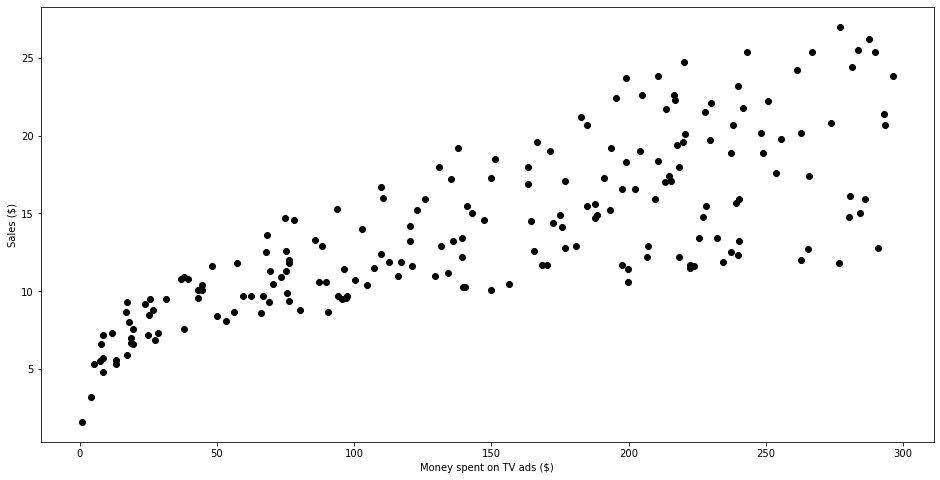

Slope:  0.04930532917987278
Intercept:  6.781986322860861
The linear model is: Y = 6.782 + 0.049305X


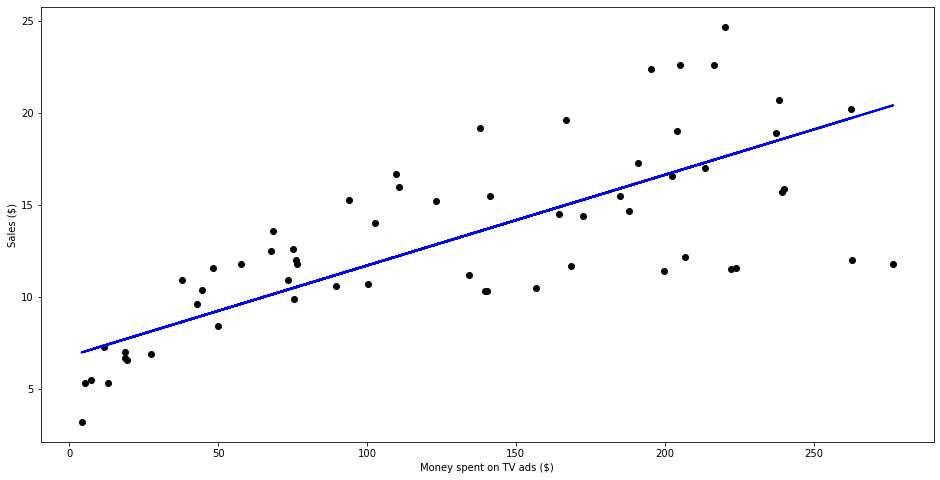

Root Mean Squared Error =  3.3740046185718096
R2 =  0.4966137274044259
[[0]
 [1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]
 [8]
 [9]]


[0 0 0 0 1 1 1 1 1 1]


LogisticRegression(random_state=0, solver='liblinear')


[0 1]


[-1.04608067]


[[0.51491375]]


[[0.74002157 0.25997843]
 [0.62975524 0.37024476]
 [0.5040632  0.4959368 ]
 [0.37785549 0.62214451]
 [0.26628093 0.73371907]
 [0.17821501 0.82178499]
 [0.11472079 0.88527921]
 [0.07186982 0.92813018]
 [0.04422513 0.95577487]
 [0.02690569 0.97309431]]


[0 0 0 1 1 1 1 1 1 1]


0.9




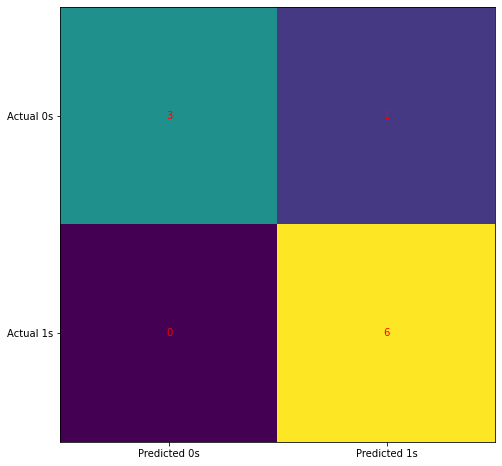

              precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       0.86      1.00      0.92         6

    accuracy                           0.90        10
   macro avg       0.93      0.88      0.89        10
weighted avg       0.91      0.90      0.90        10



In [24]:
!rm-rf Advertising.csv
!wget https://raw.githubusercontent.com/justmarkham/scikit-learn-videos/master/data/Advertising.csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split

data = pd.read_csv("Advertising.csv")
print(data.head())
print('\n')

print(data.columns)
print('\n')

print(data.drop(['Unnamed: 0'], axis=1))


plt.figure(figsize=(16, 8))
plt.scatter(
 data['TV'],
 data['Sales'],
 c='black'
)


plt.xlabel("Money spent on TV ads ($)")
plt.ylabel("Sales ($)")
plt.show()

X = data['TV'].values.reshape(-1,1)
y = data['Sales'].values.reshape(-1,1)
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = 0.3)
reg = LinearRegression()
reg.fit(x_train, y_train)

print("Slope: ",reg.coef_[0][0])
print("Intercept: ",reg.intercept_[0])
print("The linear model is: Y = {:.5} + {:.5}X".format(reg.intercept_[0], reg.coef_[0][0]))

predictions = reg.predict(x_test)
plt.figure(figsize=(16, 8))
plt.scatter(
 x_test,
 y_test,
 c='black'
)
plt.plot(
 x_test,
 predictions,
 c='blue',
 linewidth=2
)
plt.xlabel("Money spent on TV ads ($)")
plt.ylabel("Sales ($)")
plt.show()

rmse = np.sqrt(mean_squared_error(y_test,predictions))
print("Root Mean Squared Error = ",rmse)

r2 = r2_score(y_test,predictions)
print("R2 = ",r2)


import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

x = np.arange(10).reshape(-1, 1)
y = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

print(x)
print('\n')

print(y)
print('\n')

model = LogisticRegression(solver='liblinear', random_state=0)

print(model.fit(x, y))
print('\n')

print(model.classes_)
print('\n')

print(model.intercept_)
print('\n')

print(model.coef_)
print('\n')

print(model.predict_proba(x))
print('\n')

print(model.predict(x))
print('\n')

print(model.score(x, y))
print('\n')

confusion_matrix(y, model.predict(x))

cm = confusion_matrix(y, model.predict(x))

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

print(classification_report(y, model.predict(x)))


# Map Reduce 

# Program 6

In [25]:
import numpy as np
import pandas as pd
import re
import warnings 
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.colors import n_colors
from plotly.subplots import make_subplots
init_notebook_mode(connected= True)
import cufflinks as cf
cf.go_offline()
from wordcloud import WordCloud, ImageColorGenerator 
import nltk
from nltk.corpus import stopwords

In [26]:
!rm -rf amazon_vfl_reviews.csv
!wget https://raw.githubusercontent.com/tezz-io/_data/master/amazon_vfl_reviews.csv
from textblob import TextBlob
df= pd.read_csv('amazon_vfl_reviews.csv')
df.head()

--2022-02-16 15:28:47--  https://raw.githubusercontent.com/tezz-io/_data/master/amazon_vfl_reviews.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 797308 (779K) [text/plain]
Saving to: ‘amazon_vfl_reviews.csv’

amazon_vfl_reviews. 100%[===================>] 778.62K   252KB/s    in 3.1s    

2022-02-16 15:28:53 (252 KB/s) - ‘amazon_vfl_reviews.csv’ saved [797308/797308]



,asin,name,date,rating,review
0,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,2019-09-06,1,I bought this hair oil after viewing so many g...
1,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,2019-08-14,5,Used This Mama Earth Newly Launched Onion Oil ...
2,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,2019-10-19,1,So bad product...My hair falling increase too ...
3,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,2019-09-16,1,Product just smells similar to navarathna hair...
4,B07W7CTLD1,Mamaearth-Onion-Growth-Control-Redensyl,2019-08-18,5,I have been trying different onion oil for my ...


In [27]:
df.isnull().sum()
df.shape

(2782, 5)

In [28]:
df.dropna(inplace= True)
df = df.reset_index()
df.drop(['index'], axis = 1, inplace= True) 
df.shape

(2778, 5)

In [29]:
def get_brand(x):
    return x.split('-')[0]

df['brand']= df['name'].apply(get_brand)
df['brand'].unique()

array(['Mamaearth', 'Godrej', 'Titan', 'Maaza', 'Paper', 'Indiana',
       'Coca', 'Natural', 'Maggi', 'Glucon', 'Amul', 'Patanjali',
       'PATANJALI', 'Dettol', 'Savlon', 'Cinthol', 'Britannia',
       'NutriChoice', 'Streax', 'Himalaya', 'Society', 'Tata', 'Fastrack',
       'Reflex', 'MYSORE', 'Mysore'], dtype=object)

In [30]:
df['brand'] = df['brand'].str.replace('PATANJALI', 'Patanjali')
df['brand'] = df['brand'].str.replace('MYSORE', 'Mysore')

#number of unique brands
len(df['brand'].unique())

24

In [31]:
df1= pd.DataFrame(df.groupby('brand')['asin'].count().reset_index())
df1.columns= ['brand', 'count']

sort_df= df1.sort_values(['count'], ascending= True)

fig= px.bar(sort_df.iloc[:5, :], y= 'brand', x= 'count', orientation= 'h', color= 'count')
fig.update_layout(title_text= 'Top 5 brands with least number of reviews', title_x= .5, template= 'plotly_dark')
fig.show()

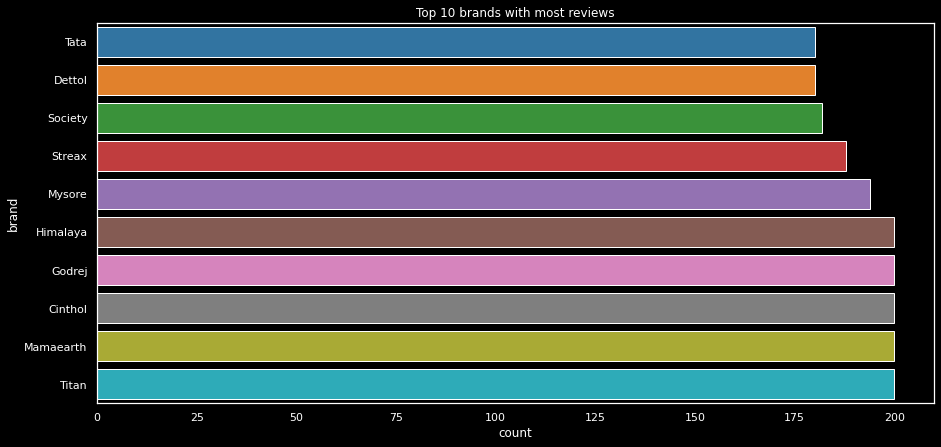

In [32]:
import seaborn as sns
sns.set(rc={'figure.figsize':(15,7)})
sns.set_theme(style="darkgrid")
plt.style.use("dark_background")
plt.title('Top 10 brands with most reviews')
sns.barplot(x= sort_df['count'].tail(10) , y= sort_df['brand'].tail(10), palette= 'tab10' ).grid(False)

In [33]:
brand= sort_df.iloc[-10: , :]['brand'].to_list()
count= sort_df.iloc[-10: , :]['count'].to_list()

fig= go.Figure(data= [go.Table(header= dict(values= ['Brand', 'Number of reviews'], fill_color= 'lightblue', height= 40 ),
                              cells= dict(values=[brand, count], height= 20))])
fig.update_layout(title_text='Top 5 Names of brands with most number of reviews',title_x=0.5,
                  template='plotly_dark')

fig.show()

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/amrutheshwaro/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


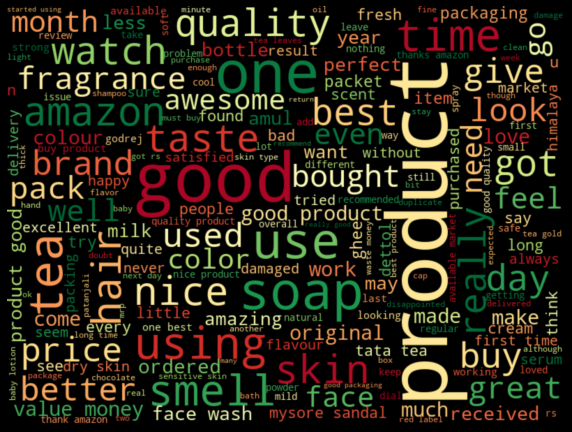

In [34]:
import nltk
nltk.download('stopwords')
stop_words = stopwords.words('english')

corpus = []
for i in range(0,len(df)):
    text= re.sub('[^a-zA-Z]', ' ', df['review'][i])
    text= text.lower()
    text= text.split()
    text= [word for word in text if not word in stop_words]
    text= ' '.join(text)
    corpus.append(text)
    
word_cloud = WordCloud(width = 800,
                       height = 600,
                       colormap = 'RdYlGn', 
                       margin = 0,
                       max_words = 200,  
                       max_font_size = 120, 
                       background_color = 'black').generate(' '.join(corpus))


plt.figure(figsize = (10, 10))
plt.imshow(word_cloud, interpolation = 'gaussian')
plt.axis('off')
plt.show()

In [35]:
rating= pd.DataFrame(df['rating'].value_counts().reset_index())
rating.columns= ['rating', 'count']

rating.sort_values('rating', ascending= False, inplace= True)
rating

,rating,count
0,5,1444
2,4,460
3,3,198
4,2,130
1,1,546


In [36]:
fig= px.bar(rating, x= 'rating', y= 'count')
fig.update_layout(title_text= 'Distribution of ratings', title_x= 0.5, template= 'plotly_dark')
fig.show()

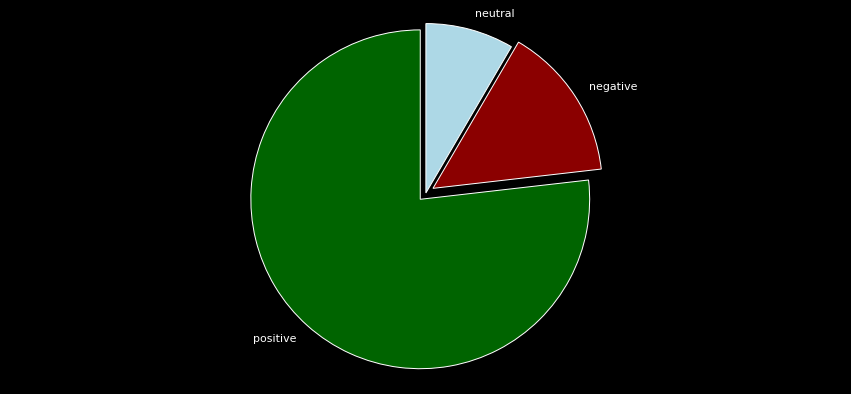

In [37]:
def polarity(text):
    return TextBlob(text).sentiment.polarity

df['polarity_score']= df['review'].apply(lambda x : polarity(x))

def sentiment(x):
    if x<0:
        return 'negative'
    elif x==0:
        return 'neutral'
    else:
        return 'positive'
    
df['polarity'] = df['polarity_score'].\
   map(lambda x: sentiment(x))
values = df['polarity'].value_counts()
labels= df['polarity'].value_counts().index
plt.pie(values , labels= labels ,explode= (.05,.05,0),
          colors=['#006400','#8B0000','#add8e6'],startangle= 90)
plt.axis('equal')
plt.show()